<a href="https://colab.research.google.com/github/nrzsdy1993/Deeplearning_Basic/blob/main/10_build_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 구현

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, Model

## 1. VGG 16

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_vgg.png?raw=true)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

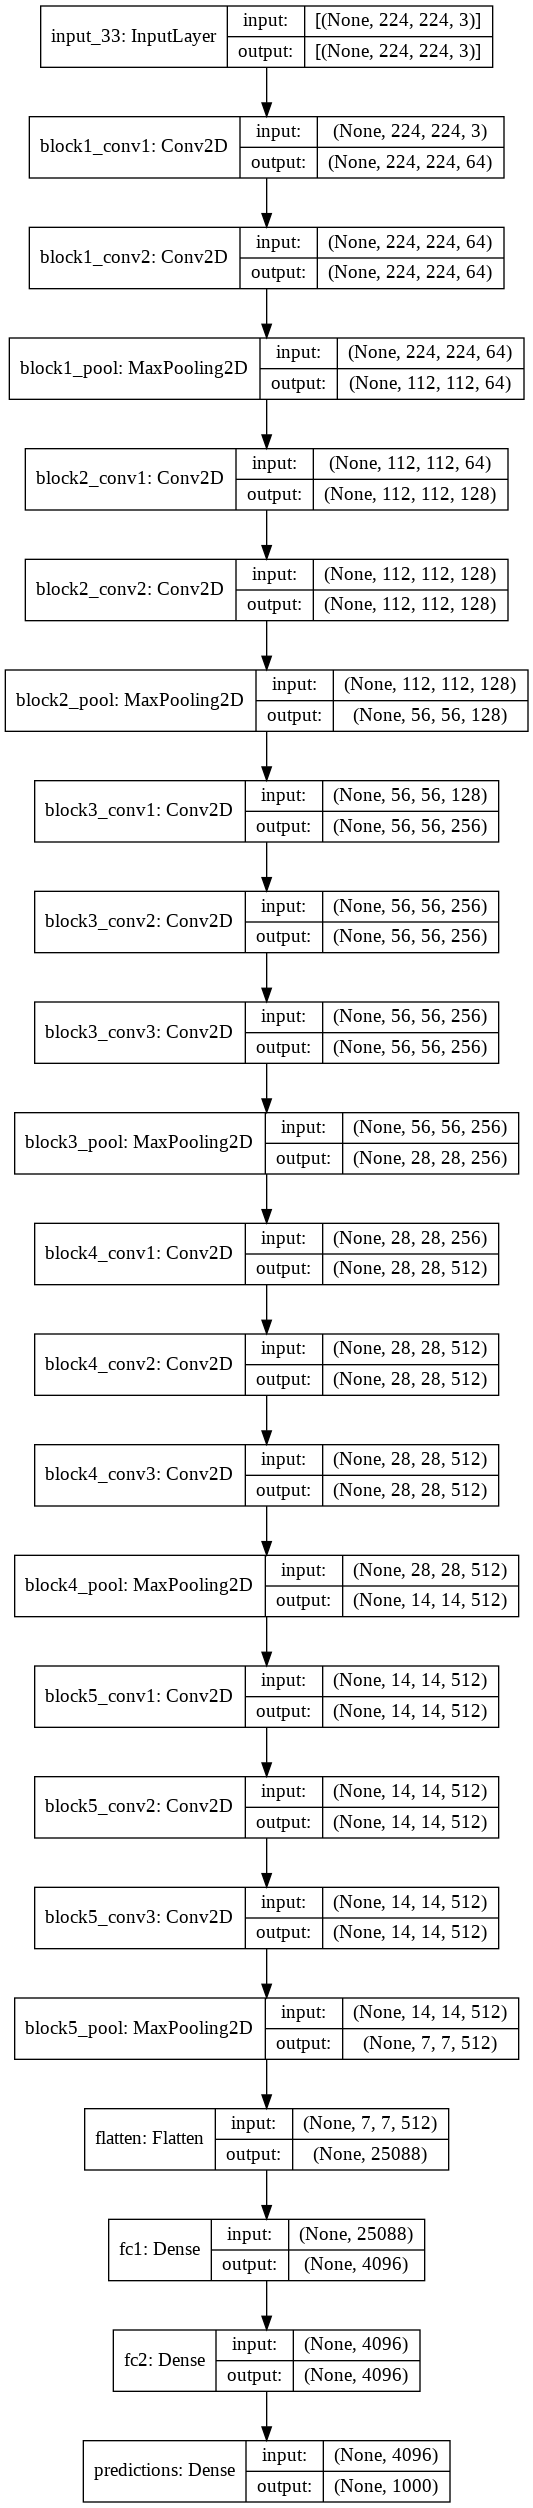

In [ ]:
from tensorflow.keras import applications
base_model = applications.vgg16.VGG16()

from tensorflow.keras import utils

base_model.summary()
utils.plot_model(base_model, show_shapes=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def conv2d(x, d=64):
  y = layers.Conv2D(d ,3, padding="same", activation='relu')(x)
  return y

def maxpool(x, pool_size=(2,2), stride=(2,2)):
  y = layers.MaxPooling2D(pool_size=pool_size, strides=stride)(x)
  return y

x = layers.Input(shape=(224,224,3))

y = conv2d(x)
y = conv2d(y)
y = maxpool(y)
y = conv2d(y, d=128)
y = conv2d(y, d=128)
y = maxpool(y)
y = conv2d(y, d=256)
y = conv2d(y, d=256)
y = conv2d(y, d=256)
y = maxpool(y)
y = layers.Flatten(name='Flatten')(y)

model = models.Model(x, y)
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 56, 56, 128)       0  

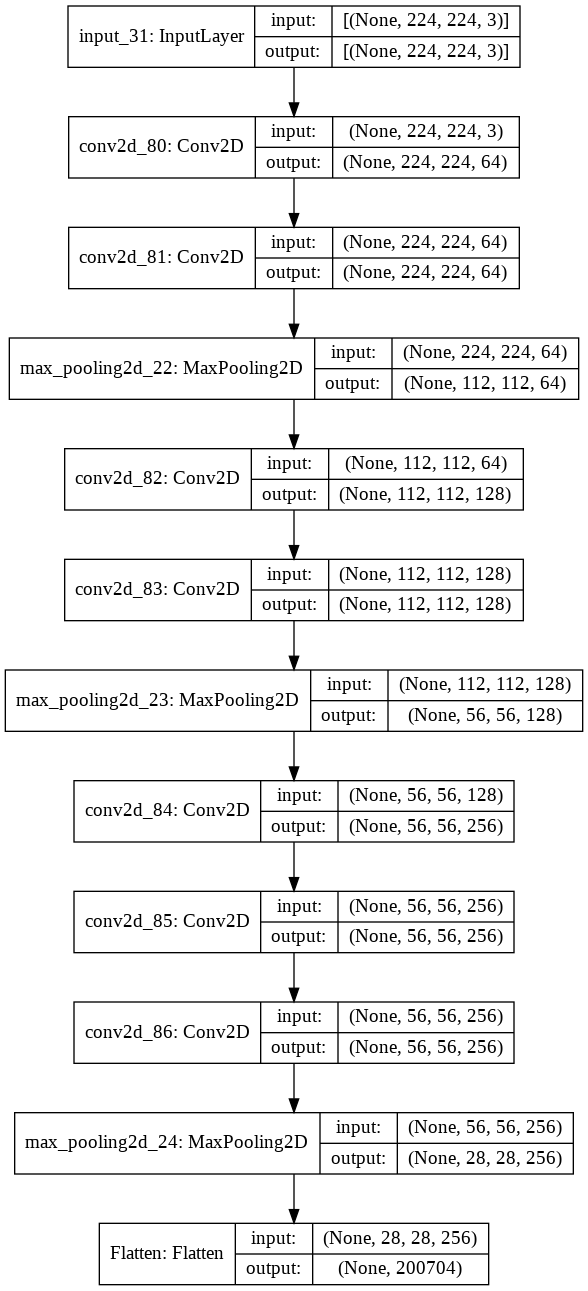

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

## 2. MobileNET

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_dense.png?raw=true)

In [ ]:
base_model = applications.ResNet50()
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_23[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## 3. ResNet